In [1]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
def load_images_from_folder(folder_path, target_size=(64, 64)):
    images = []
    labels = []
    label_mapping = {}  # Mapping from person names to numeric labels
    label_counter = 0

    for person_folder in os.listdir(folder_path):
        person_path = os.path.join(folder_path, person_folder)

        if os.path.isdir(person_path):
            label_mapping[person_folder] = label_counter
            label_counter += 1

            for filename in os.listdir(person_path):
                img_path = os.path.join(person_path, filename)
                img = load_img(img_path, target_size=target_size, color_mode='grayscale')
                img = img_to_array(img) / 255.0
                images.append(img)
                labels.append(label_mapping[person_folder])

    return np.array(images), np.array(labels), label_mapping

In [3]:
main_folder_path = r"C:\Users\Arnold\Downloads\Final Data Set"
X, y, label_mapping = load_images_from_folder(main_folder_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [4]:
CNNmodel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # Assuming 9 individuals
])

In [5]:
CNNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
CNNmodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


176/176 [==============================] - 14s 59ms/step - loss: 1.6889 - accuracy: 0.3869 - val_loss: 1.0826 - val_accuracy: 0.6811
Epoch 2/10
176/176 [==============================] - 10s 57ms/step - loss: 1.0552 - accuracy: 0.6349 - val_loss: 0.6936 - val_accuracy: 0.7933
Epoch 3/10
176/176 [==============================] - 10s 57ms/step - loss: 0.8011 - accuracy: 0.7273 - val_loss: 0.5506 - val_accuracy: 0.8445
Epoch 4/10
176/176 [==============================] - 10s 57ms/step - loss: 0.6776 - accuracy: 0.7670 - val_loss: 0.5342 - val_accuracy: 0.8509
Epoch 5/10
176/176 [==============================] - 10s 57ms/step - loss: 0.5633 - accuracy: 0.8036 - val_loss: 0.4025 - val_accuracy: 0.8736
Epoch 6/10
176/176 [==============================] - 10s 57ms/step - loss: 0.5108 - accuracy: 0.8242 - val_loss: 0.3814 - val_accuracy: 0.8899
Epoch 7/10
176/176 [==============================] - 10s 57ms/step - loss: 0.4360 - accuracy: 0.8468 - val_loss: 0.3275 - val_accurac

In [7]:
test_loss, test_accuracy = CNNmodel.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

44/44 [==============================] - 1s 11ms/step - loss: 0.2403 - accuracy: 0.9382
Test Accuracy: 93.82%


In [8]:
predictions = CNNmodel.predict(X_test)
predicted_labels_CNN = np.argmax(predictions, axis=1)

44/44 [==============================] - 1s 12ms/step


Accuracy: 93.82%


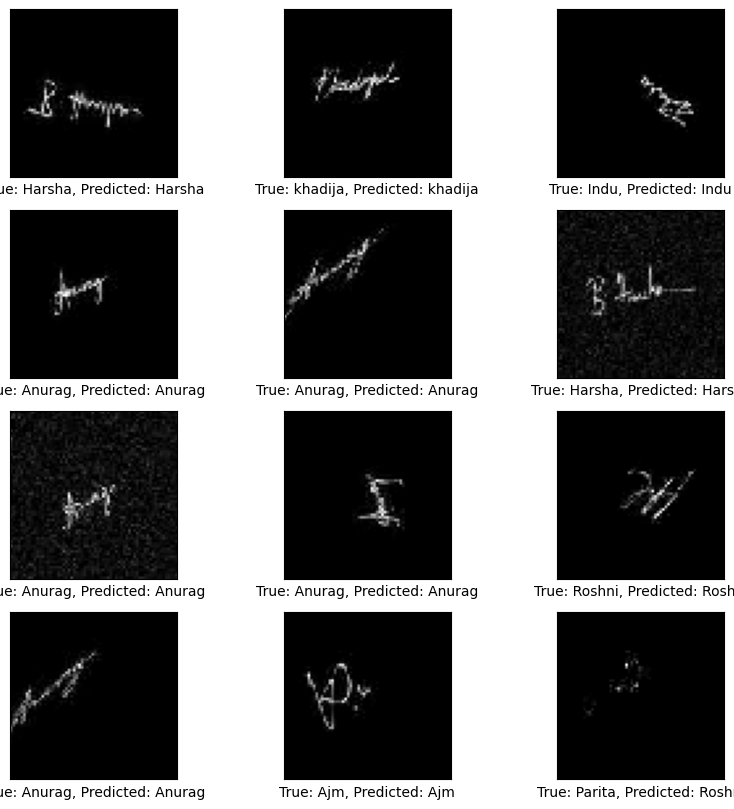

In [9]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate the accuracy
accuracy_CNN = accuracy_score(y_test, predicted_labels_CNN)

print(f"Accuracy: {accuracy_CNN * 100:.2f}%")# Assuming label_mapping is your original dictionary mapping person names to numeric labels
# We create an inverse mapping from numeric labels to person names
inverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Now use the inverse mapping to convert numeric predictions to person names
predicted_names = [inverse_label_mapping[label] for label in predicted_labels_CNN]

# Then you can display the images with the predicted person names and the true names
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(64, 64), cmap=plt.cm.binary)
    # Use the predicted_names and true names instead of numeric labels
    true_name = inverse_label_mapping[y_test[i]]
    predicted_name = predicted_names[i]
    plt.xlabel(f"True: {true_name}, Predicted: {predicted_name}")
plt.show()

# Logistic Regression model

In [10]:
# Flatten the image data for logistic regression
# The images are 64x64, so they become 64*64=4096-sized vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
# We'll use the 'lbfgs' solver because it's a good default choice.
# Increase 'max_iter' if the model needs more iterations to converge.
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='ovr')

# Train the model
logistic_model.fit(X_train_flat, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [13]:
# Evaluate the model
test_accuracy_LR = logistic_model.score(X_test_flat, y_test)
print(f"Logistic Regression Test Accuracy: {test_accuracy_LR*100:.2f}%")

Logistic Regression Test Accuracy: 74.22%


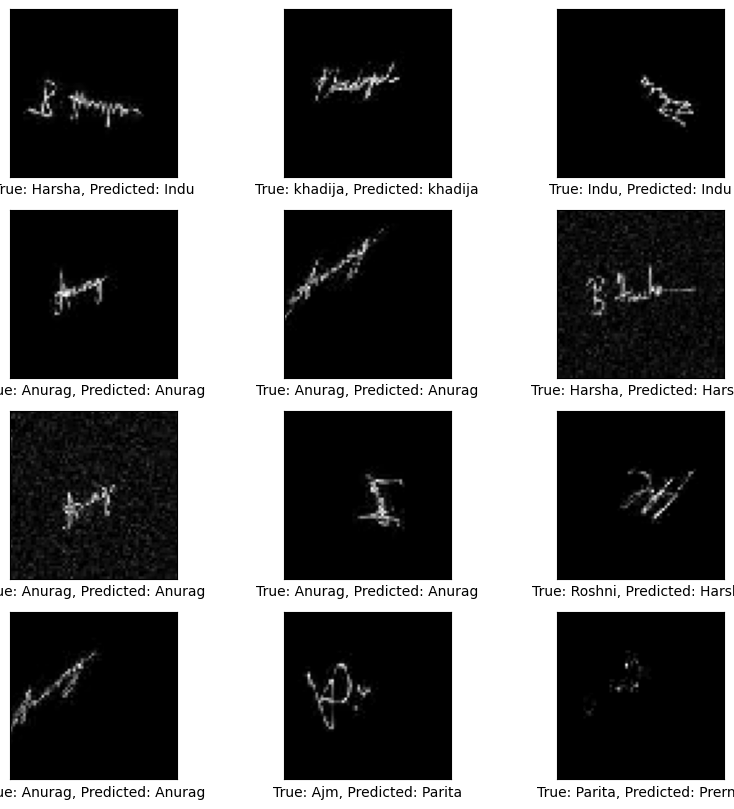

In [14]:
# Predict the test set
predicted_labels_LR = logistic_model.predict(X_test_flat)

# Create an inverse mapping from numeric labels to person names
inverse_label_mapping = {v: k for k, v in label_mapping.items()}

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(64, 64), cmap=plt.cm.binary)
    true_label_name = inverse_label_mapping[y_test[i]]
    predicted_label_name = inverse_label_mapping[predicted_labels_LR[i]]
    plt.xlabel(f"True: {true_label_name}, Predicted: {predicted_label_name}")
plt.show()

# Decision Tree model

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train_flat, y_train)

DecisionTreeClassifier()

In [16]:
# Evaluate the model
test_accuracy_DT = decision_tree_model.score(X_test_flat, y_test)
print(f"Decision Tree Test Accuracy: {test_accuracy_DT*100:.2f}%")

Decision Tree Test Accuracy: 52.34%


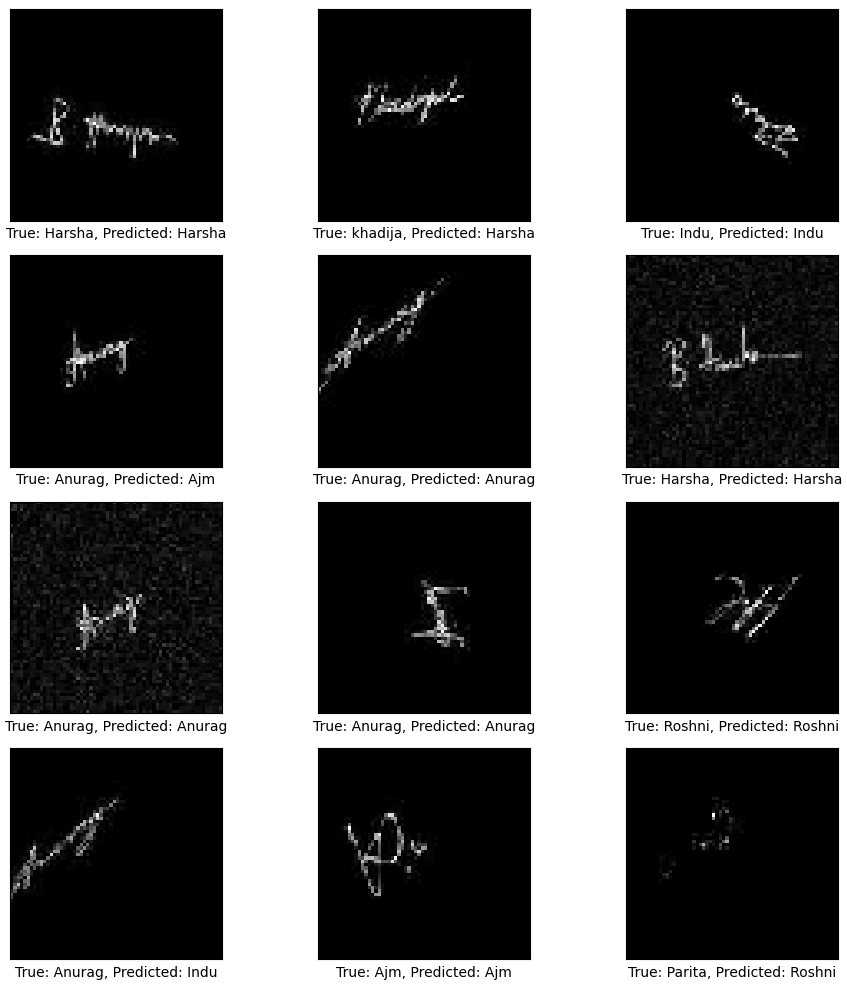

In [17]:
# Predict the test set
predicted_labels_DT = decision_tree_model.predict(X_test_flat)

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(64, 64), cmap=plt.cm.binary)
    true_label_name = inverse_label_mapping[y_test[i]]
    predicted_label_name = inverse_label_mapping[predicted_labels_DT[i]]
    plt.xlabel(f"True: {true_label_name}, Predicted: {predicted_label_name}")
plt.tight_layout()
plt.show()

# Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100)  # n_estimators is the number of trees

# Train the model
random_forest_model.fit(X_train_flat, y_train)

RandomForestClassifier()

In [19]:
# Evaluate the model
test_accuracy_RF = random_forest_model.score(X_test_flat, y_test)
print(f"Random Forest Test Accuracy: {test_accuracy_RF*100:.2f}%")

Random Forest Test Accuracy: 83.66%


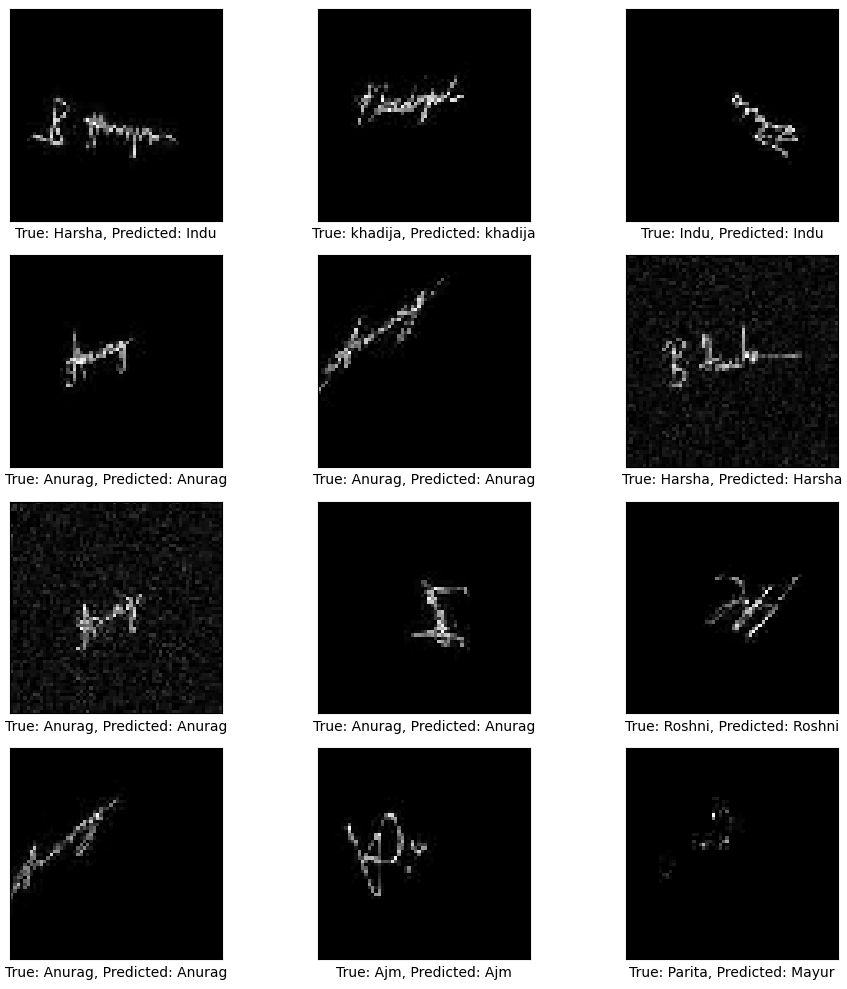

In [20]:
# Predict the test set
predicted_labels_RF = random_forest_model.predict(X_test_flat)

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(64, 64), cmap=plt.cm.binary)
    true_label_name = inverse_label_mapping[y_test[i]]
    predicted_label_name = inverse_label_mapping[predicted_labels_RF[i]]
    plt.xlabel(f"True: {true_label_name}, Predicted: {predicted_label_name}")
plt.tight_layout()
plt.show()

# SVM model

In [21]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(X_train_flat, y_train)

SVC(kernel='linear', probability=True)

In [22]:
# Evaluate the model
test_accuracy_svm = svm_model.score(X_test_flat, y_test)
print(f"SVM Test Accuracy: {test_accuracy_svm*100:.2f}%")

SVM Test Accuracy: 78.98%


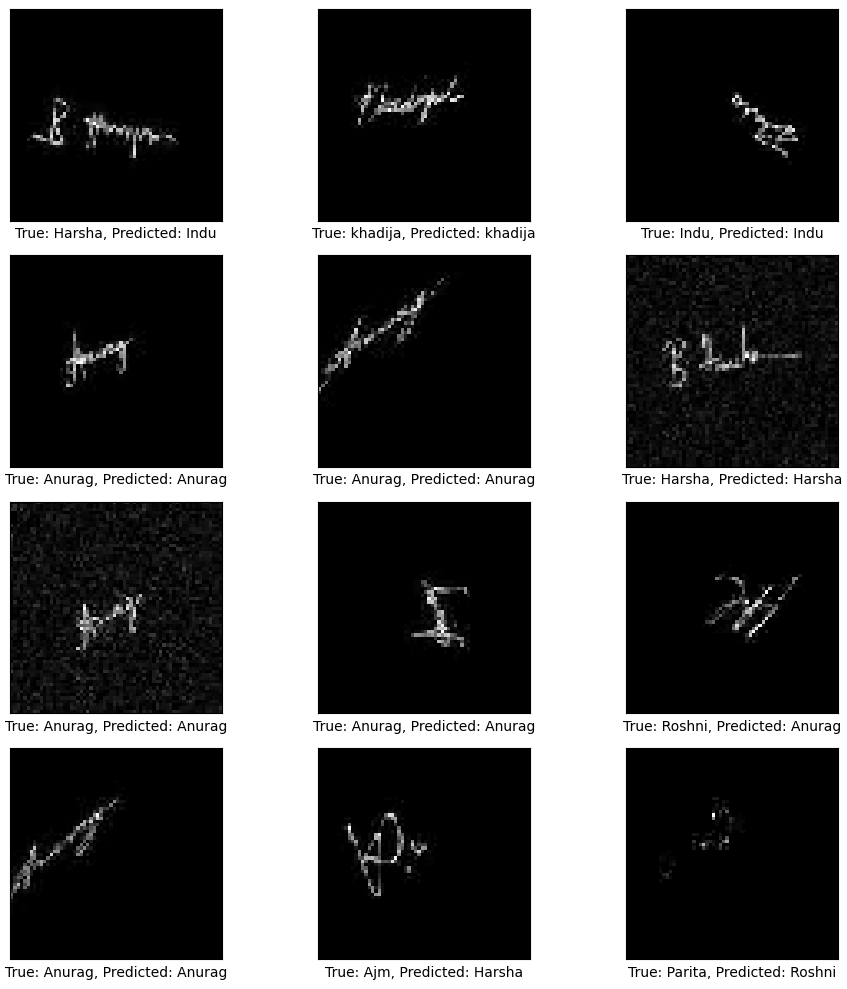

In [23]:
# Predict the test set
predicted_labels_svm = svm_model.predict(X_test_flat)

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(64, 64), cmap=plt.cm.binary)
    true_label_name = inverse_label_mapping[y_test[i]]
    predicted_label_name = inverse_label_mapping[predicted_labels_svm[i]]
    plt.xlabel(f"True: {true_label_name}, Predicted: {predicted_label_name}")
plt.tight_layout()
plt.show()

# KNN Classification model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
# You can experiment with different values of n_neighbors (the 'k' in KNN)
knn_model = KNeighborsClassifier(n_neighbors=2)

# Train the model
knn_model.fit(X_train_flat, y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
# Evaluate the model
test_accuracy_knn = knn_model.score(X_test_flat, y_test)
print(f"KNN Test Accuracy: {test_accuracy_knn*100:.2f}%")

KNN Test Accuracy: 72.87%


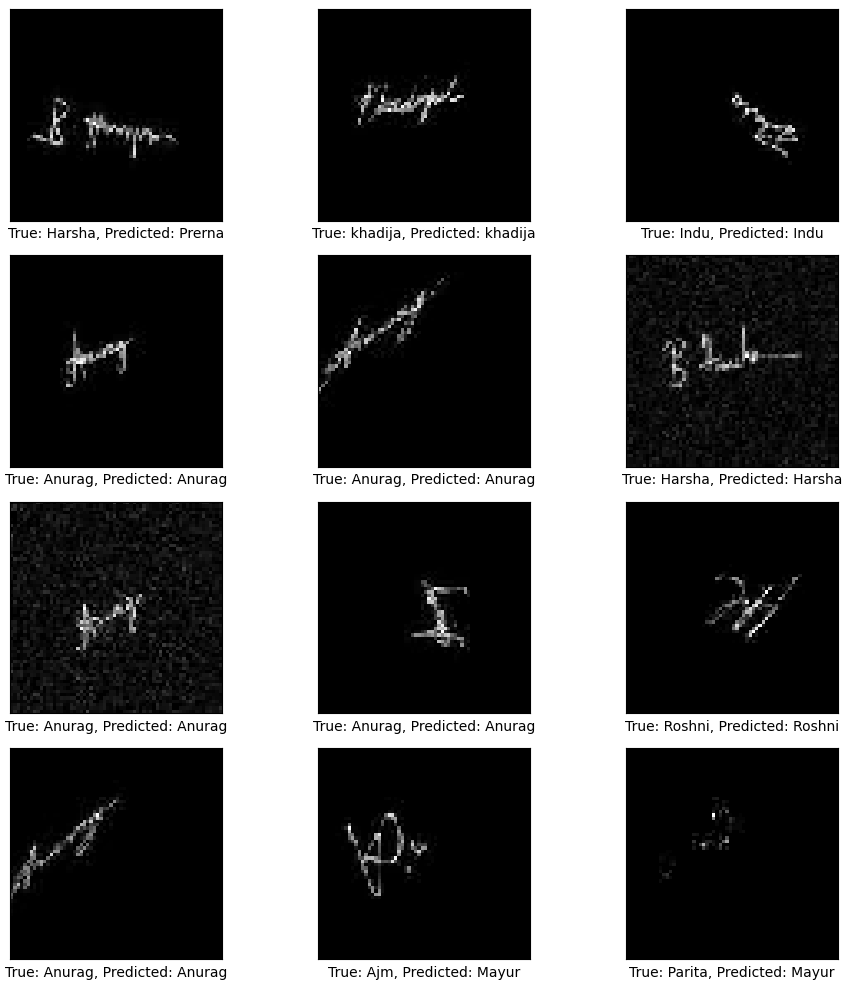

In [26]:
# Predict the test set
predicted_labels_knn = knn_model.predict(X_test_flat)

# Display the first 10 images, predictions, and true labels
import matplotlib.pyplot as plt

# Create an inverse mapping from numeric labels to person names
inverse_label_mapping = {v: k for k, v in label_mapping.items()}

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(64, 64), cmap=plt.cm.binary)
    true_label_name = inverse_label_mapping[y_test[i]]
    predicted_label_name = inverse_label_mapping[predicted_labels_knn[i]]
    plt.xlabel(f"True: {true_label_name}, Predicted: {predicted_label_name}")
plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'predictions' is the output of your CNN model and it's in probability format
# Convert the probabilities to class labels
cnn_predicted_labels = np.argmax(predictions, axis=1)

# Now, you can print classification reports for each model
print("CNN Model:")
print(classification_report(y_test, cnn_predicted_labels))
print("Logistic Regression Model:")
print(classification_report(y_test, predicted_labels_LR))
print("Decision Tree Model:")
print(classification_report(y_test, predicted_labels_DT))
print("Random Forest Model:")
print(classification_report(y_test, predicted_labels_RF))
print("SVM Model:")
print(classification_report(y_test, predicted_labels_svm))
print("KNN Model:")
print(classification_report(y_test, predicted_labels_knn))

CNN Model:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       176
           1       0.98      0.96      0.97       176
           2       0.98      0.97      0.97       176
           3       0.96      0.95      0.96       176
           4       0.95      0.91      0.93        88
           5       0.92      0.95      0.94       176
           6       0.95      0.88      0.91       176
           7       0.73      0.94      0.82        88
           8       0.92      0.90      0.91       176

    accuracy                           0.94      1408
   macro avg       0.93      0.94      0.93      1408
weighted avg       0.94      0.94      0.94      1408

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       176
           1       0.80      0.84      0.82       176
           2       0.75      0.70      0.73       176
           3       0.84      0.76      0

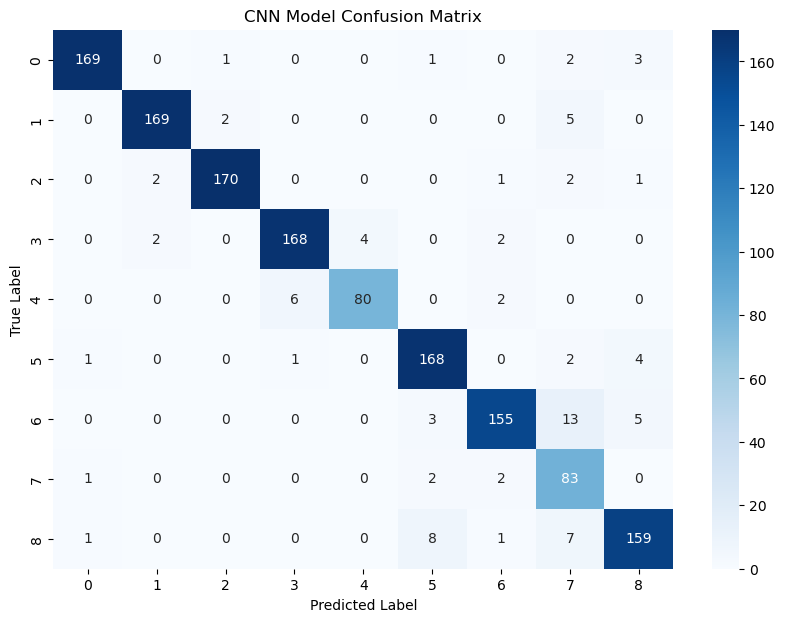

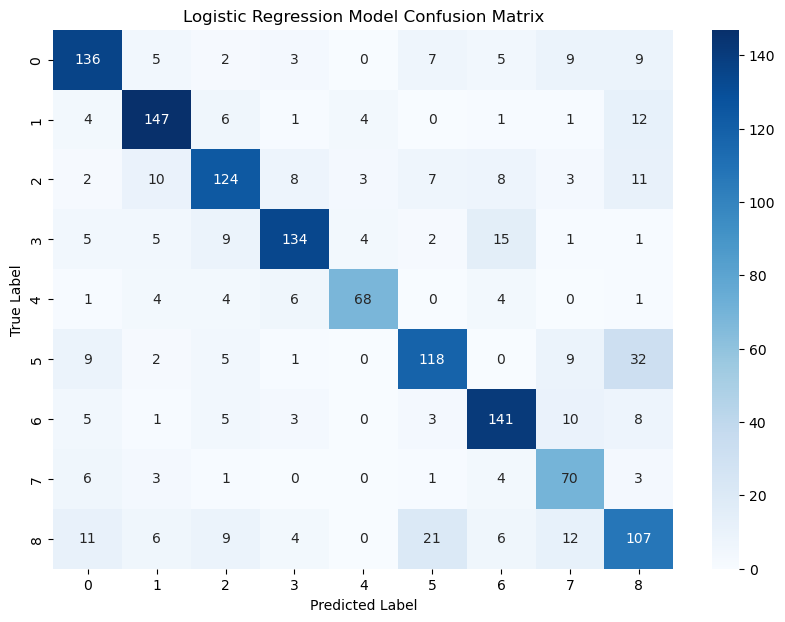

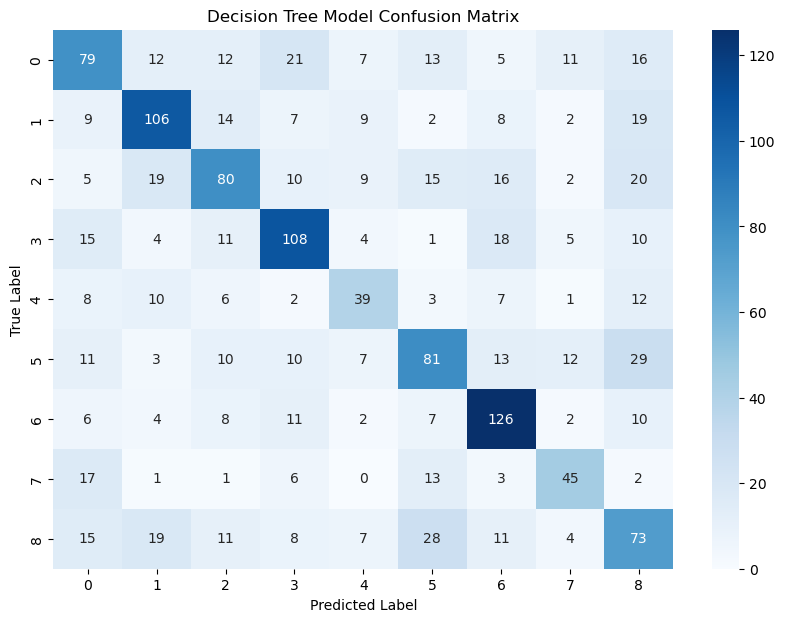

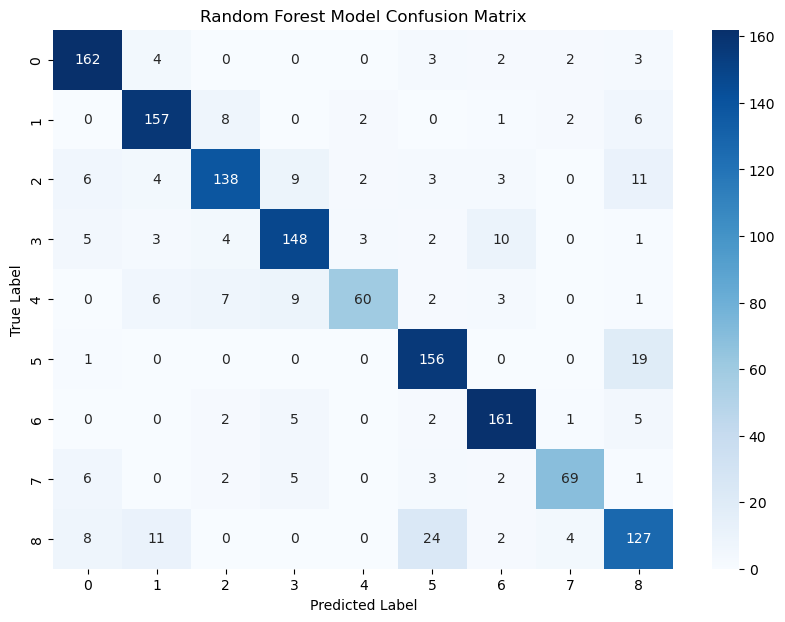

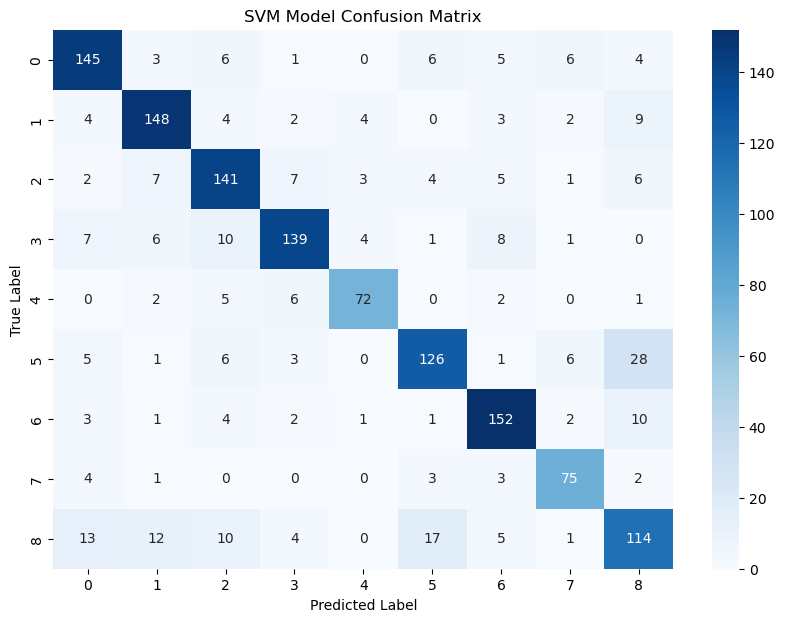

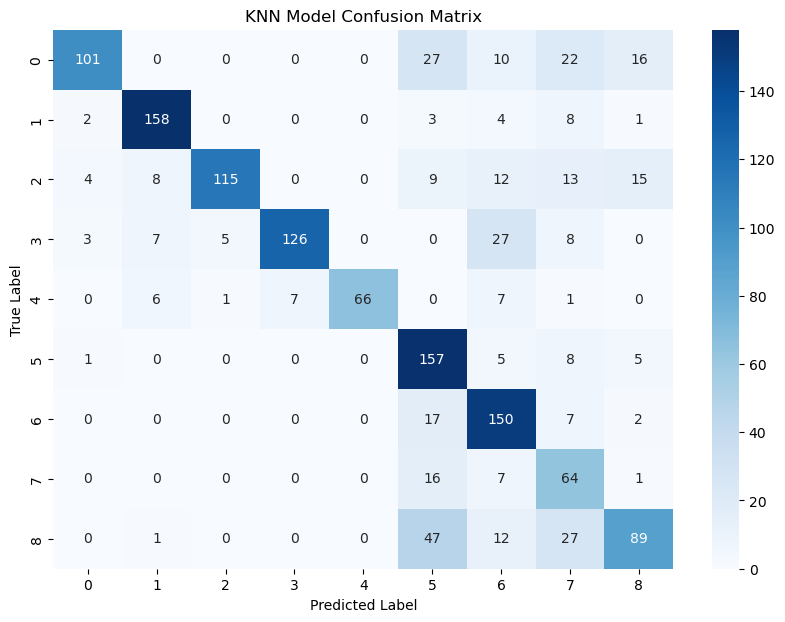

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plotting confusion matrices for each model
plot_confusion_matrix(y_test, cnn_predicted_labels, "CNN Model Confusion Matrix")
plot_confusion_matrix(y_test, predicted_labels_LR, "Logistic Regression Model Confusion Matrix")
plot_confusion_matrix(y_test, predicted_labels_DT, "Decision Tree Model Confusion Matrix")
plot_confusion_matrix(y_test, predicted_labels_RF, "Random Forest Model Confusion Matrix")
plot_confusion_matrix(y_test, predicted_labels_svm, "SVM Model Confusion Matrix")
plot_confusion_matrix(y_test, predicted_labels_knn, "KNN Model Confusion Matrix")